In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import glob
from matplotlib import pyplot as plt
from pathlib import Path
import statistics
import scipy

In [2]:
df=pd.read_csv("/home/nishu/my_projects/NMP/22_08_22/GPCC_daily_for_validation/WH_yearly.csv")

In [3]:
df

,Year,ppt,ppanmly
0,1982,669.369186,0.712057
1,1983,700.605162,1.067719
2,1984,511.660299,-1.083665
3,1985,556.581391,-0.572179
4,1986,622.624622,0.179809
5,1987,491.644940,-1.311566
6,1988,789.761326,2.082878
7,1989,538.910799,-0.773382
8,1990,658.655958,0.590073
9,1991,481.447687,-1.427675


In [4]:
print(statistics.stdev(df["ppanmly"]))

1.0000000000000004


In [5]:
tlrfrm=df.drop(df.index[21:40],0)
print(tlrfrm)

    Year         ppt   ppanmly
0   1982  669.369186  0.712057
1   1983  700.605162  1.067719
2   1984  511.660299 -1.083665
3   1985  556.581391 -0.572179
4   1986  622.624622  0.179809
5   1987  491.644940 -1.311566
6   1988  789.761326  2.082878
7   1989  538.910799 -0.773382
8   1990  658.655958  0.590073
9   1991  481.447687 -1.427675
10  1992  709.802757  1.172446
11  1993  513.091620 -1.067367
12  1994  622.479977  0.178162
13  1995  702.563553  1.090018
14  1996  741.952488  1.538512
15  1997  688.867738  0.934073
16  1998  650.724873  0.499767
17  1999  499.910470 -1.217452
18  2000  530.539640 -0.868699
19  2001  526.416008 -0.915652
20  2002  508.680281 -1.117596


In [6]:
folder = '/home/nishu/my_projects/NMP/22_08_22/Future_Projection_Himlaya_2_8_2022/rawdata_339599WH_4.5/monthly_1986_2005'

corr=np.zeros(43)
stddev=np.zeros(43)
models=[]
c=0
for file in Path(folder).glob('*.txt'):
    df1 = pd.read_csv(file)
    df1=df1.drop(df1.index[153:156],0)
    df1=df1.drop(df1.index[0:132],0)
#     print(df1)
    res=scipy.stats.pearsonr(tlrfrm["ppanmly"],df1["ppanmly"])
    corr[c]=res[0]
    stddev[c]=scipy.stats.tstd(df1["ppanmly"])
    c+=1
    mname=str(file)
#     print(len(mname))
    mname=mname[119:len(mname)-68]
#     print(type(mname))
    models.append(mname)
#     print(mname)
# print("corr",corr)
# print("stddev",stddev)
#print(models)
tlr=pd.DataFrame()
tlr["Mname"]=models
tlr["corr"]=corr
tlr["stddev"]=stddev
tlr['QuantileRank']= pd.qcut(tlr['stddev'], q = 5, labels = False)
print(tlr)


                  Mname      corr    stddev  QuantileRank
0        Amon_ACCESS1-0  0.388900  0.557178             2
1        Amon_ACCESS1-3  0.066048  0.543221             2
2     Amon_bcc-csm1-1-m -0.462692  0.589763             3
3       Amon_bcc-csm1-1 -0.356579  0.344811             1
4          Amon_BNU-ESM  0.491600  0.658237             3
5          Amon_CanESM2  0.194259  0.410976             1
6            Amon_CCSM4  0.009035  1.196469             4
7        Amon_CESM1-BGC  0.022209  0.628281             3
8       Amon_CESM1-CAM5 -0.228164  0.809042             4
9          Amon_CMCC-CM  0.345854  0.285817             1
10        Amon_CMCC-CMS -0.069375  0.419338             1
11        Amon_CNRM-CM5 -0.179906  0.532148             2
12   Amon_CSIRO-Mk3-6-0 -0.062875  0.154523             0
13        Amon_EC-EARTH -0.556927  0.571802             2
14       Amon_FGOALS-g2 -0.241069  0.479075             2
15         Amon_FIO-ESM -0.163729  0.699000             4
16    Amon_GIS

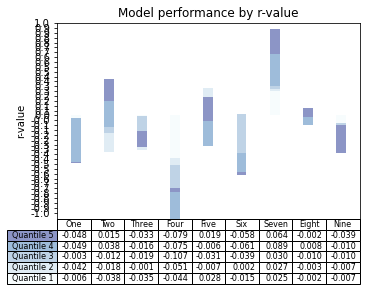

In [11]:
data = [[ -0.062875, -0.375515,  -0.352653, -0.440016,  0.281268, -0.147159, 0.248507, -0.024755, -0.073289 ],
        [ -0.356579, 0.194259,  0.345854,  -0.069375, -0.352916, 0.164001, 0.023813, -0.001668 ,0 ],
        [ 0.388900,  0.066048, -0.179906, -0.556927, -0.241069, -0.405412, 0.032632, -0.074518, -0.023086 ],
        [ -0.462692,  0.491600, 0.022209, 0.315218,  0.253886, -0.220695, 0.580222, 0.180579, 0 ],
        [ 0.009035, -0.228164, -0.163729, -0.035558,  0.246569, 0.024796, -0.248976, -0.097671, -0.290399 ]]

columns = ('One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine')
rows = ['Quantile %d' % x for x in (5, 4, 3, 2, 1)]

values = np.arange(-1.0, 1.0, 0.05)
value_increment = 0.1

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.3

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    #cell_text.append(['%1.1f' % (x) for x in y_offset])
    cell_text.append(['{:.3f}'.format(x/10) for x in y_offset])
    
    # Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("r-value".format(value_increment))
plt.yticks(values * value_increment*10, ['%1.1f' % val for val in values])
plt.xticks([])
plt.title('Model performance by r-value')

plt.show()

In [65]:
data = [[ -0.062875, -0.375515,  -0.352653, -0.440016,  0.281268, -0.147159, 0.248507, -0.024755, -0.073289 ],
        [ -0.356579, 0.194259,  0.345854,  -0.069375, -0.352916, 0.164001, 0.023813, -0.001668 ],
        [ 0.388900,  0.066048, -0.179906, -0.556927, -0.241069, -0.405412, 0.032632, -0.074518, -0.023086 ],
        [ -0.462692,  0.491600, 0.022209, 0.315218,  0.253886, -0.220695, 0.580222, 0.180579 ],
        [ 0.009035, -0.228164, -0.163729, -0.035558,  0.246569, 0.024796, -0.248976, -0.097671, -0.290399 ]]
print(len(data))
data[row]

5


IndexError: list index out of range

In [66]:
print(tlr)

                  Mname      corr    stddev  QuantileRank
0        Amon_ACCESS1-0  0.388900  0.557178             2
1        Amon_ACCESS1-3  0.066048  0.543221             2
2     Amon_bcc-csm1-1-m -0.462692  0.589763             3
3       Amon_bcc-csm1-1 -0.356579  0.344811             1
4          Amon_BNU-ESM  0.491600  0.658237             3
5          Amon_CanESM2  0.194259  0.410976             1
6            Amon_CCSM4  0.009035  1.196469             4
7        Amon_CESM1-BGC  0.022209  0.628281             3
8       Amon_CESM1-CAM5 -0.228164  0.809042             4
9          Amon_CMCC-CM  0.345854  0.285817             1
10        Amon_CMCC-CMS -0.069375  0.419338             1
11        Amon_CNRM-CM5 -0.179906  0.532148             2
12   Amon_CSIRO-Mk3-6-0 -0.062875  0.154523             0
13        Amon_EC-EARTH -0.556927  0.571802             2
14       Amon_FGOALS-g2 -0.241069  0.479075             2
15         Amon_FIO-ESM -0.163729  0.699000             4
16    Amon_GIS